In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('taxonomy.txt')

In [3]:
data.head()

,Taxon,Petals,Internode,Sepal,Bract,Petiole,Leaf,Fruit
0,I,5.621498,29.480596,2.462107,18.203409,11.279097,1.128033,7.876151
1,I,4.994617,28.360247,2.429321,17.652049,11.040838,1.197617,7.025416
2,I,4.767505,27.254318,2.570497,19.408385,10.490722,1.003808,7.817479
3,I,6.299446,25.924238,2.066051,18.379155,11.801823,1.614052,7.672492
4,I,6.489375,25.211308,2.901583,17.313047,10.121590,1.813333,7.758443


Plot Petals, Internode, and Sepal against Fruit. What relationships do you observe? (2 pts.)

<AxesSubplot:xlabel='Petals', ylabel='Fruit'>

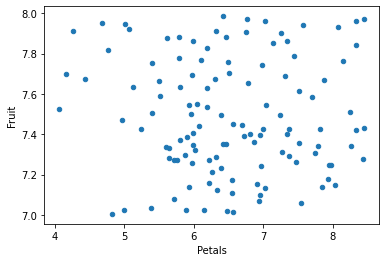

In [4]:
data.plot.scatter(x='Petals', y='Fruit')

<AxesSubplot:xlabel='Internode', ylabel='Fruit'>

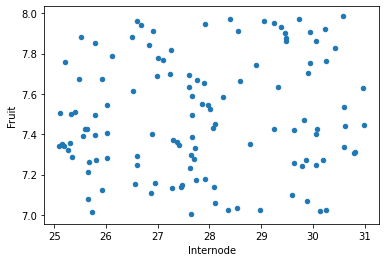

In [5]:
data.plot.scatter(x='Internode', y='Fruit')

<AxesSubplot:xlabel='Sepal', ylabel='Fruit'>

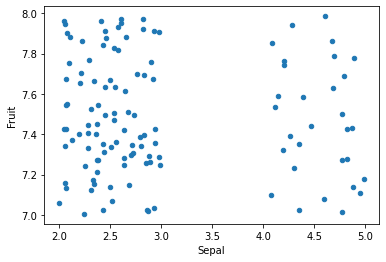

In [6]:
data.plot.scatter(x='Sepal', y='Fruit')

Generate histograms for Petals, Internode, Sepal, and Fruit. Describe the distribution of each variable. Are they skewed to a side; if so, which side? Do they exhibit a normal distribution? If not, what do they look like? (2 pts.)

<AxesSubplot:ylabel='Frequency'>

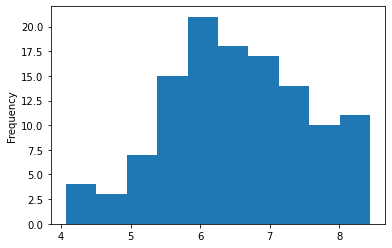

In [7]:
data['Petals'].plot.hist(alpha=1)

<AxesSubplot:ylabel='Frequency'>

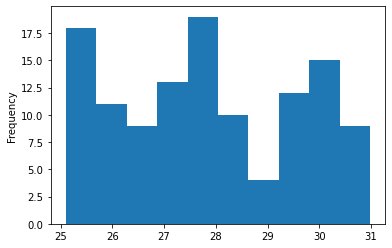

In [8]:
data['Internode'].plot.hist(alpha=1)

<AxesSubplot:ylabel='Frequency'>

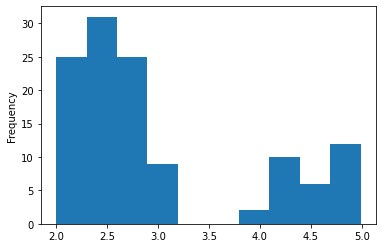

In [9]:
data['Sepal'].plot.hist(alpha=1)

<AxesSubplot:ylabel='Frequency'>

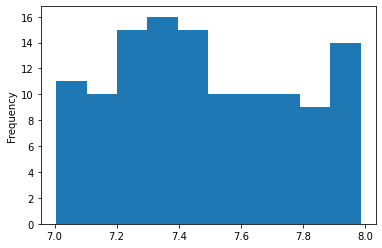

In [10]:
data['Fruit'].plot.hist(alpha=1)

The next graph you need to create is a boxplot of Bract against Fruit. Bin the values of Bract. Base the binning by mean, not count. Name each bin with a roman numeral: BractI, BractII, BractIII, etc. Name the new column of data Bract_Cat. (2 pts.)

In [11]:
from scipy.stats import binned_statistic

In [12]:
data['Bract'].max()

19.99634132

In [13]:
data['Bract'].min()

17.04141579

In [14]:
bin_counts,bin_edges,binnum = binned_statistic(data['Bract'], 
                                               data['Bract'], 
                                               statistic='mean', 
                                               bins=5)

In [15]:
bin_edges

array([17.04141579, 17.6324009 , 18.223386  , 18.81437111, 19.40535621,
       19.99634132])

In [16]:
bin_interval = [17.04, 17.63, 18.22, 18.81, 19.41, 20]

binlabels = ['BractI', 'BractII', 'BractIII', 'BractIV', 'BractV']

Bract_Cat = pd.cut(data['Bract'], bin_interval, right=False, retbins=False, labels=binlabels)

In [17]:
Bract_Cat.name = 'Bract_Cat'

In [18]:
data = data.join(pd.DataFrame(Bract_Cat))

In [19]:
data[['Bract', 'Bract_Cat']].sort_values(by='Bract')

,Bract,Bract_Cat
75,17.041416,BractI
113,17.042944,BractI
5,17.072157,BractI
110,17.073279,BractI
40,17.084171,BractI
...,...,...
7,19.873762,BractV
91,19.911665,BractV
109,19.984975,BractV
21,19.995021,BractV


<AxesSubplot:title={'center':'Fruit'}, xlabel='Bract_Cat'>

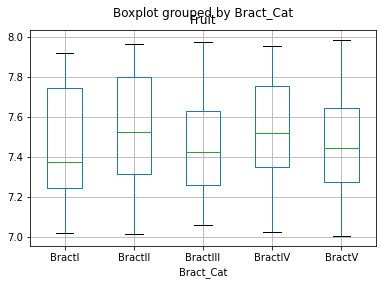

In [20]:
data.boxplot(column='Fruit', by='Bract_Cat')

Generate a bar chart for Taxon and Fruit. Select 4 rows of data, one with Taxon of I, one with II, one with III, and one with IV. Do the same with Bract_Cat, except select 4 rows of data. The criteria for the selection is entirely up to. Order the categories with BractI first and BractV last (see example below); same with Taxon (see example below)

In [57]:
I_df = data[data['Taxon'] == 'I'] 
II_df = data[data['Taxon'] == 'II'] 
III_df = data[data['Taxon'] == 'III'] 
IV_df = data[data['Taxon'] == 'IV'] 

In [67]:
row1 = I_df.sample(n = 1)
row2 = II_df.sample(n = 1)
row3 = III_df.sample(n = 1)
row4 = IV_df.sample(n = 1)
selected_df = [row1, row2, row3, row4]
selected_df = pd.concat(selected_df)
selected_df

,Taxon,Petals,Internode,Sepal,Bract,Petiole,Leaf,Fruit,Bract_Cat
1,I,4.994617,28.360247,2.429321,17.652049,11.040838,1.197617,7.025416,BractII
43,II,8.445347,28.391867,2.820234,19.831098,7.806911,1.875240,7.971315,BractV
82,III,6.948655,25.786918,2.827683,18.457777,9.452671,2.720343,7.396404,BractIII
93,IV,6.425556,30.580796,4.607472,19.428635,9.852476,1.579892,7.985552,BractV


<AxesSubplot:xlabel='Taxon'>

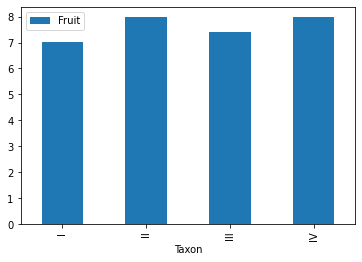

In [68]:
selected_df.plot.bar(x='Taxon', y='Fruit')

In [70]:
I2_df = data[data['Bract_Cat'] == 'BractI'] 
II2_df = data[data['Bract_Cat'] == 'BractII'] 
III2_df = data[data['Bract_Cat'] == 'BractIII'] 
IV2_df = data[data['Bract_Cat'] == 'BractIV'] 

In [73]:
row1_2 = I2_df.sample(n = 4)
row2_2 = II2_df.sample(n = 4)
row3_2 = III2_df.sample(n = 4)
row4_2 = IV2_df.sample(n = 4)
selected_df2 = [row1_2, row2_2, row3_2, row4_2]
selected_df2 = pd.concat(selected_df2)
selected_df2

,Taxon,Petals,Internode,Sepal,Bract,Petiole,Leaf,Fruit,Bract_Cat
92,IV,7.931554,27.906661,4.985480,17.099765,10.934674,1.788450,7.180509,BractI
106,IV,5.965560,25.320880,4.771112,17.333232,9.313900,1.926746,7.499035,BractI
38,II,7.239731,27.660798,2.446001,17.198259,9.118367,1.177664,7.494689,BractI
40,II,6.482875,30.142021,2.868524,17.084171,9.807589,1.699837,7.019452,BractI
99,IV,5.714140,25.651698,4.597587,18.008405,9.642151,1.391719,7.079658,BractII
118,IV,6.957973,29.603806,4.075159,17.979469,10.603912,1.707471,7.097120,BractII
46,II,7.879811,27.758264,2.495427,18.101190,7.566014,1.027404,7.670108,BractII
26,I,5.006043,27.923463,2.054945,17.893958,10.292855,1.231613,7.948527,BractII
49,II,6.338347,25.921477,2.306363,18.563446,7.031612,1.935156,7.124514,BractIII
55,II,7.976802,26.594929,2.638240,18.352939,9.482006,1.791931,7.245717,BractIII


<AxesSubplot:xlabel='Bract_Cat'>

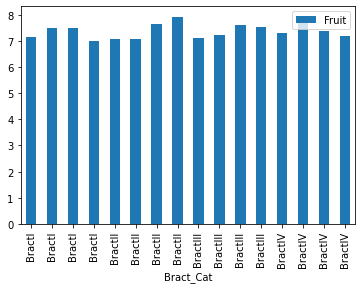

In [74]:
selected_df2.plot.bar(x='Bract_Cat', y='Fruit')